In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

# Beneficiários do Bolsa Família por Região ao Longo dos anos

In [2]:
bolsa_familia = pd.read_csv('distribuicao_bolsafamilia.csv')
bolsa_familia

,_id,co_uf,no_uf,ano,variavel,social_categoria,social_subcategoria,valor
0,1,11,RO,2004,Assistência Social,Bolsa Família,Benefício médio recebido pelas famílias do Bol...,8.444700e+02
1,2,11,RO,2004,Assistência Social,Bolsa Família,Famílias beneficiárias,5.494200e+04
2,3,11,RO,2004,Assistência Social,Bolsa Família,Valor Total Repassado do Bolsa Família,2.504001e+07
3,4,11,RO,2005,Assistência Social,Bolsa Família,Benefício médio recebido pelas famílias do Bol...,7.533100e+02
4,5,11,RO,2005,Assistência Social,Bolsa Família,Famílias beneficiárias,6.834300e+04
...,...,...,...,...,...,...,...,...
1534,1535,53,DF,2021,Assistência Social,Bolsa Família,Famílias beneficiárias,9.098000e+04
1535,1536,53,DF,2021,Assistência Social,Bolsa Família,Valor Total Repassado do Bolsa Família,9.570864e+07
1536,1537,53,DF,2023,Assistência Social,Bolsa Família,Benefício médio recebido pelas famílias do Bol...,3.473870e+03
1537,1538,53,DF,2023,Assistência Social,Bolsa Família,Famílias beneficiárias,1.686330e+05


In [3]:
bolsa_familia = bolsa_familia.drop(['_id', 'co_uf', 'variavel', 'social_categoria', ], axis=1) 

In [4]:
data = {'Estado': bolsa_familia['no_uf'],
        'Ano': bolsa_familia['ano'],
        'Categoria': bolsa_familia ['social_subcategoria'],
        'Beneficiarios': bolsa_familia ['valor']
        }

dataFrame = pd.DataFrame(data)
dataFrame

,Estado,Ano,Categoria,Beneficiarios
0,RO,2004,Benefício médio recebido pelas famílias do Bol...,8.444700e+02
1,RO,2004,Famílias beneficiárias,5.494200e+04
2,RO,2004,Valor Total Repassado do Bolsa Família,2.504001e+07
3,RO,2005,Benefício médio recebido pelas famílias do Bol...,7.533100e+02
4,RO,2005,Famílias beneficiárias,6.834300e+04
...,...,...,...,...
1534,DF,2021,Famílias beneficiárias,9.098000e+04
1535,DF,2021,Valor Total Repassado do Bolsa Família,9.570864e+07
1536,DF,2023,Benefício médio recebido pelas famílias do Bol...,3.473870e+03
1537,DF,2023,Famílias beneficiárias,1.686330e+05


In [5]:
def selecionar_linhas(dataFrame, start_index=1, step=3): #função para ir de três em três a partir do indice 1
    return dataFrame.iloc[start_index::step]

df_selecionado = selecionar_linhas(dataFrame)
print(df_selecionado)

     Estado   Ano               Categoria  Beneficiarios
1        RO  2004  Famílias beneficiárias        54942.0
4        RO  2005  Famílias beneficiárias        68343.0
7        RO  2006  Famílias beneficiárias        94953.0
10       RO  2007  Famílias beneficiárias        97270.0
13       RO  2008  Famílias beneficiárias        92914.0
...     ...   ...                     ...            ...
1525     DF  2018  Famílias beneficiárias        72535.0
1528     DF  2019  Famílias beneficiárias        66683.0
1531     DF  2020  Famílias beneficiárias        83939.0
1534     DF  2021  Famílias beneficiárias        90980.0
1537     DF  2023  Famílias beneficiárias       168633.0

[513 rows x 4 columns]


In [6]:
df_selecionado

,Estado,Ano,Categoria,Beneficiarios
1,RO,2004,Famílias beneficiárias,54942.0
4,RO,2005,Famílias beneficiárias,68343.0
7,RO,2006,Famílias beneficiárias,94953.0
10,RO,2007,Famílias beneficiárias,97270.0
13,RO,2008,Famílias beneficiárias,92914.0
...,...,...,...,...
1525,DF,2018,Famílias beneficiárias,72535.0
1528,DF,2019,Famílias beneficiárias,66683.0
1531,DF,2020,Famílias beneficiárias,83939.0
1534,DF,2021,Famílias beneficiárias,90980.0


In [7]:
df = df_selecionado.drop(['Categoria', 'Estado'], axis=1) 

In [8]:
bolsa_familia_anual = df.groupby('Ano').mean().reset_index()
bolsa_familia_anual

,Ano,Beneficiarios
0,2004,243401.444444
1,2005,322238.703704
2,2006,406141.111111
3,2007,409002.814815
4,2008,391036.888889
5,2009,458182.037037
6,2010,473267.407407
7,2011,494870.185185
8,2012,514894.629630
9,2013,521711.074074


In [9]:
pd.options.display.float_format = '{:.2f}'.format
bolsa_familia_anual

,Ano,Beneficiarios
0,2004,243401.44
1,2005,322238.70
2,2006,406141.11
3,2007,409002.81
4,2008,391036.89
5,2009,458182.04
6,2010,473267.41
7,2011,494870.19
8,2012,514894.63
9,2013,521711.07


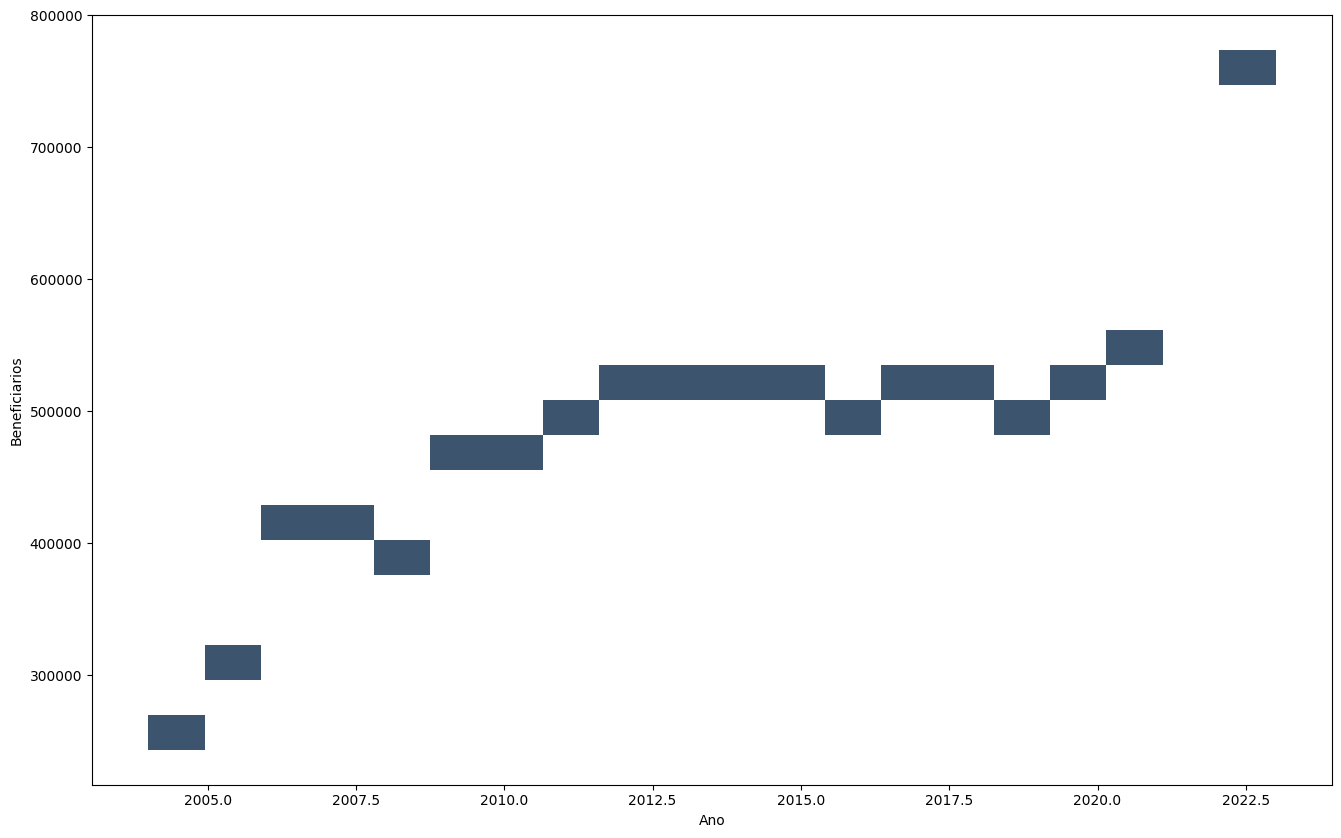

In [10]:
plt.figure(figsize=(16, 10))
sns.histplot(data= bolsa_familia_anual, x='Ano', y= 'Beneficiarios', bins=20, kde=True)
plt.show()

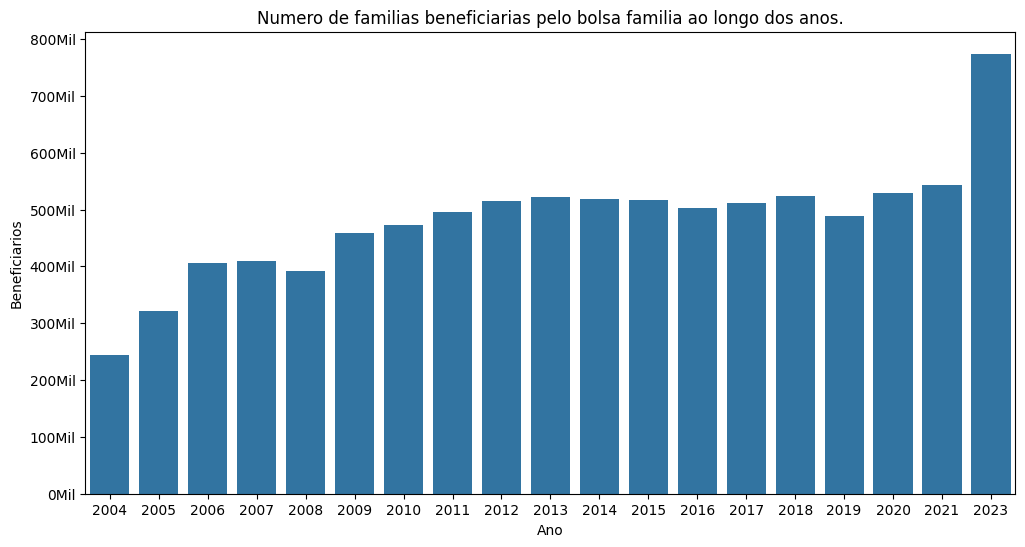

In [11]:

from matplotlib.ticker import FuncFormatter

def thousands(x, pos):
    return '%1.0f' % (x * 1e-3) + 'Mil'


bolsa_familia_anual = bolsa_familia_anual.sort_values(by='Beneficiarios', ascending=False)
bolsa_familia_anual
plt.figure(figsize=(12, 6))
sns.barplot(x='Ano', y='Beneficiarios', data=bolsa_familia_anual, errorbar=None, estimator=np.mean)
plt.xlabel('Ano')
plt.ylabel('Beneficiarios')
plt.title('Numero de familias beneficiarias pelo bolsa familia ao longo dos anos.')
plt.xticks(rotation=0)  # Rotacionar os rótulos do eixo x se necessário
formatter = FuncFormatter(thousands)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()